In [1]:
import numpy as np 
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df_train = pd.read_csv('exoTrain.csv')

In [3]:
df_train.head()

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42       5.08     -39.54  
1      -4.86       0.76     -11.70       6.46      16.00      19.93  
2     -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3      20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4    -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  

[5 rows x 3198 columns]

In [4]:
df_train.isnull().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

In [5]:
# Data is highly imabalanced  
df_train['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

<AxesSubplot:xlabel='LABEL', ylabel='count'>

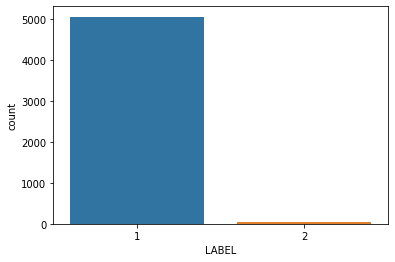

In [6]:
sns.countplot(data=df_train, x='LABEL')

As the data is highly imbalanced, it needs to be oversampled or undersampled so that the models isn't biased towards the label 1, as it is majority.

# Visualizing the Flux intensities

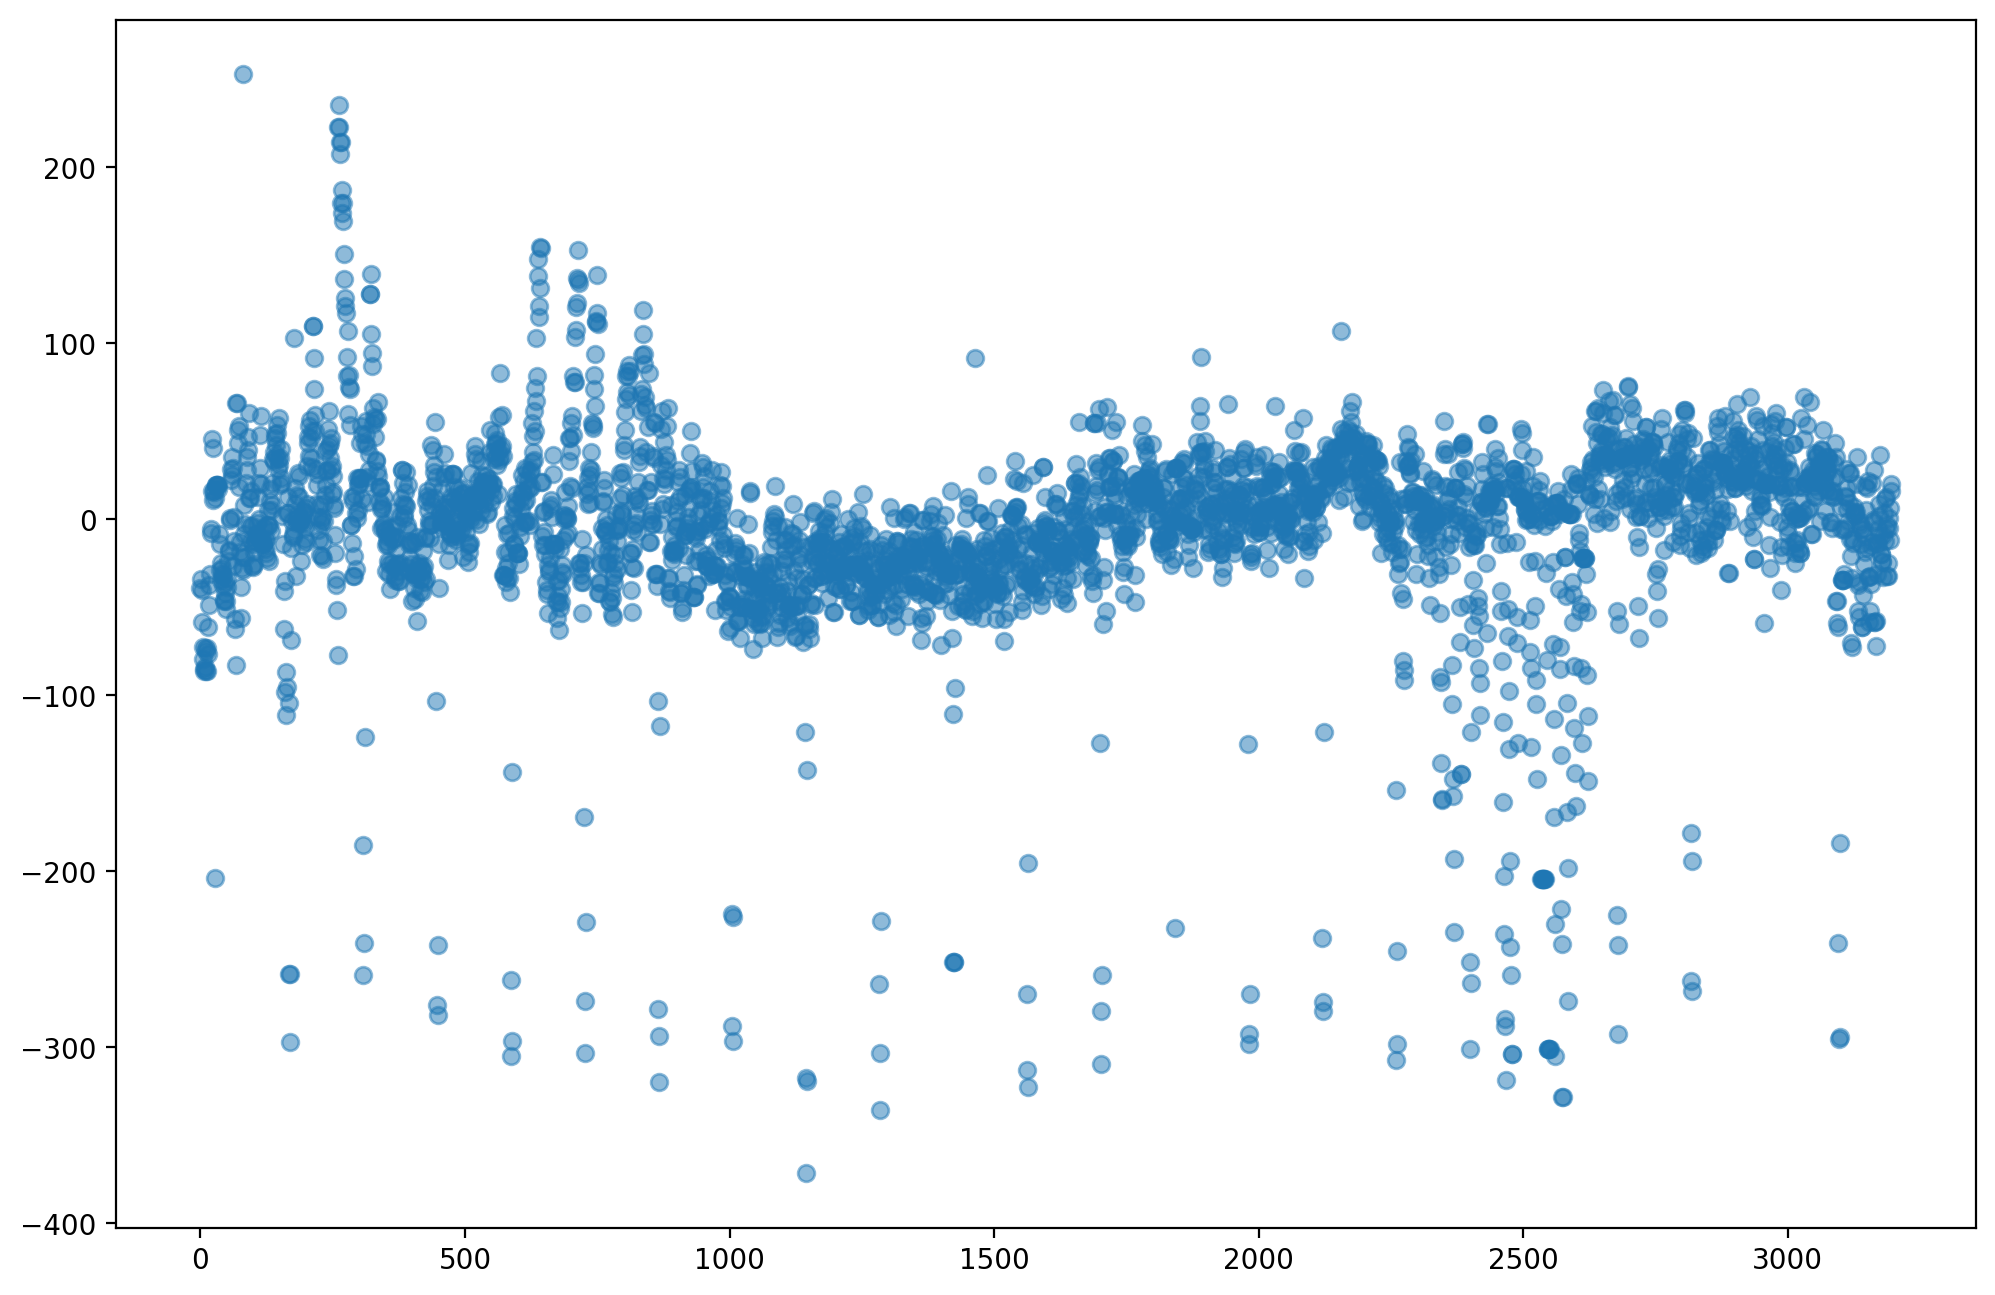

In [7]:
plt.figure(figsize=(12,8), dpi=200)
plt.scatter(np.arange(3197), df_train[df_train['LABEL'] == 2].iloc[1, 1:], alpha=0.5)

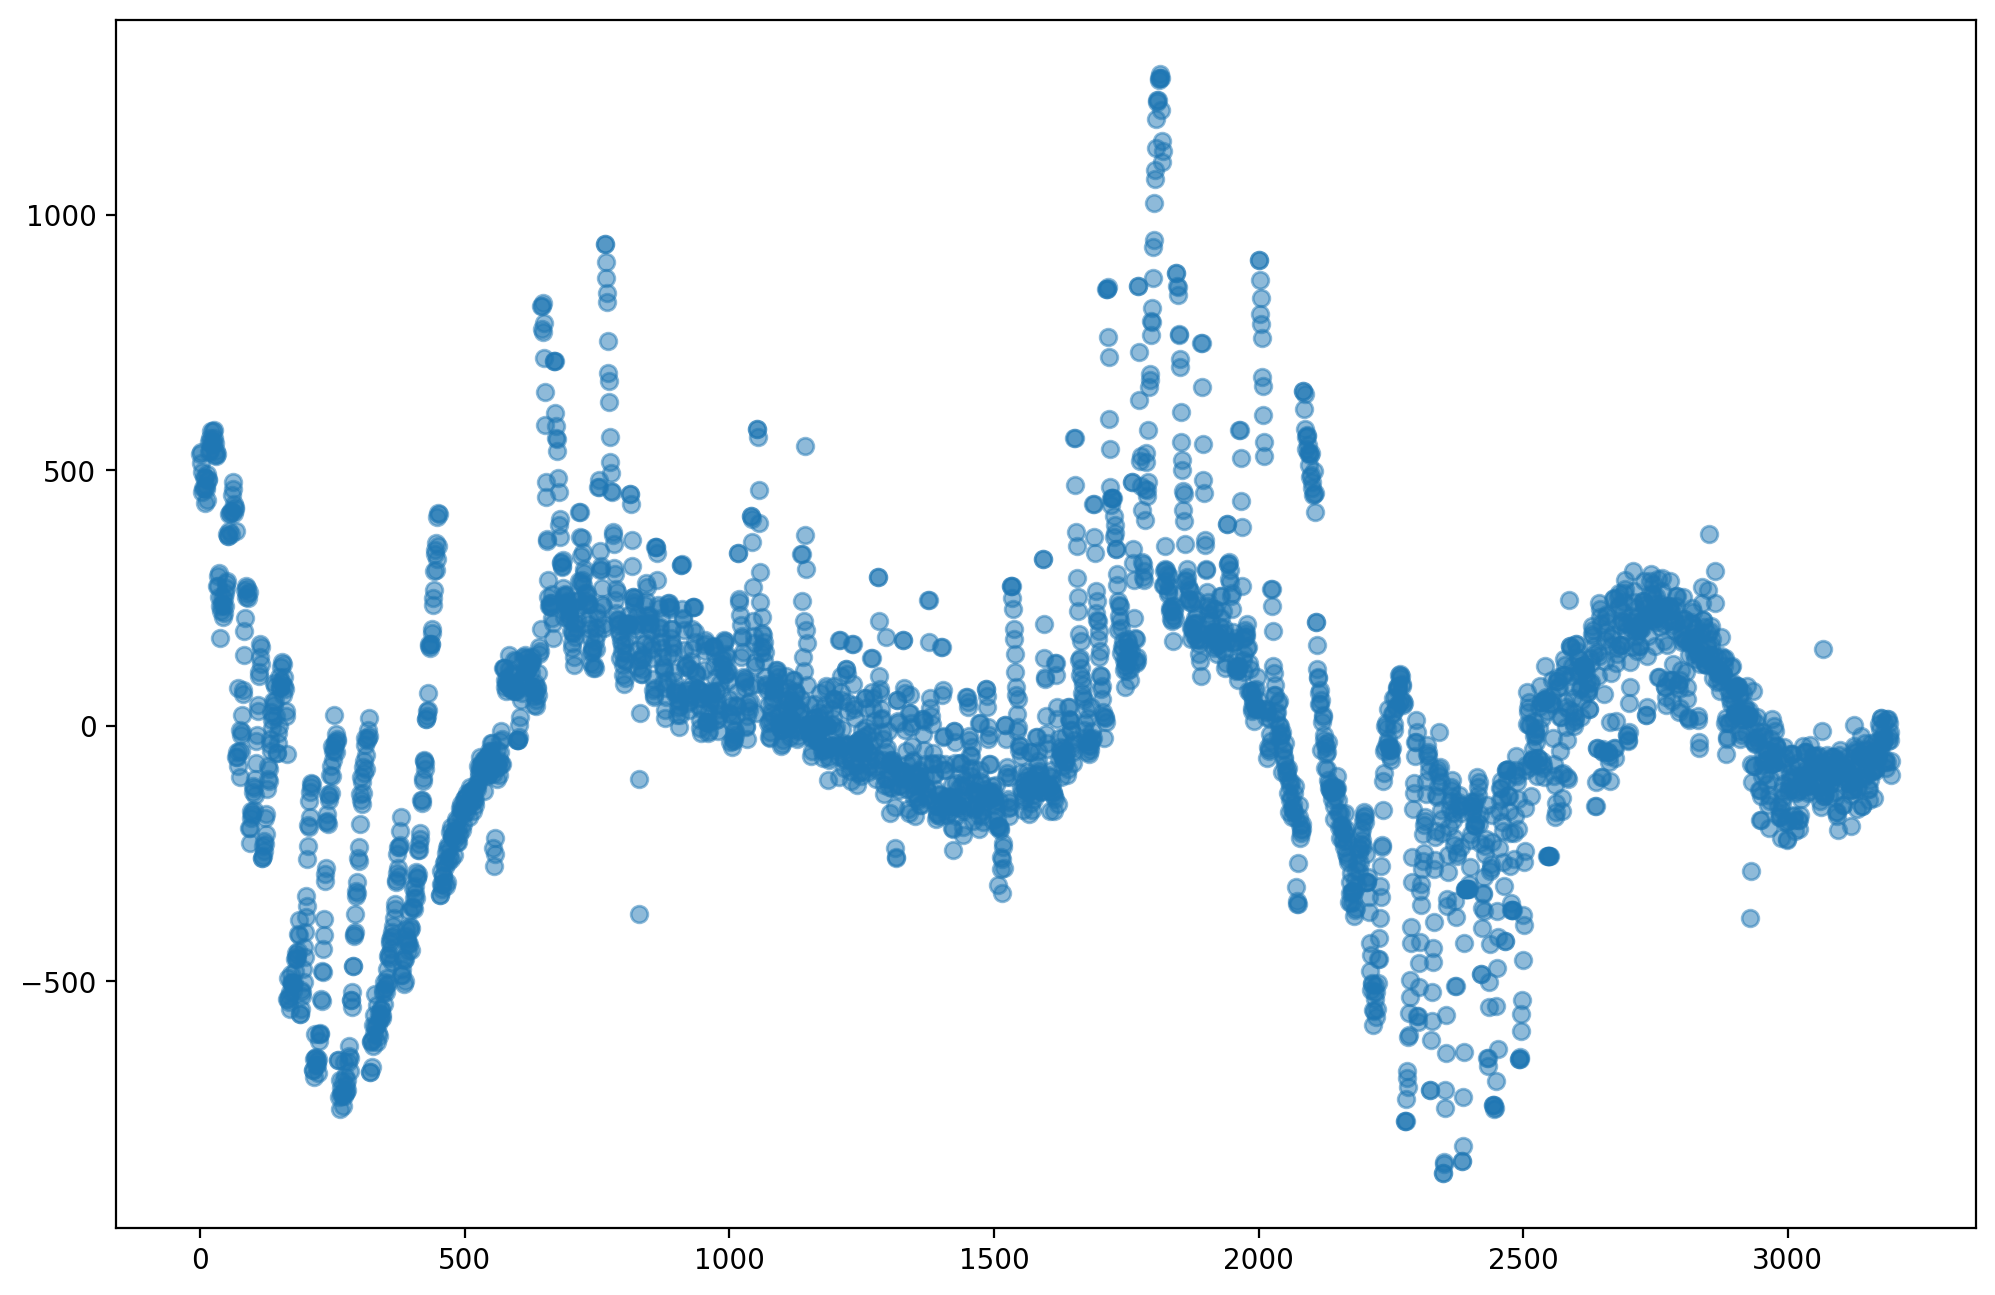

In [8]:
plt.figure(figsize=(12,8), dpi=200)
plt.scatter(np.arange(3197), df_train[df_train['LABEL'] == 2].iloc[2, 1:], alpha=0.5)

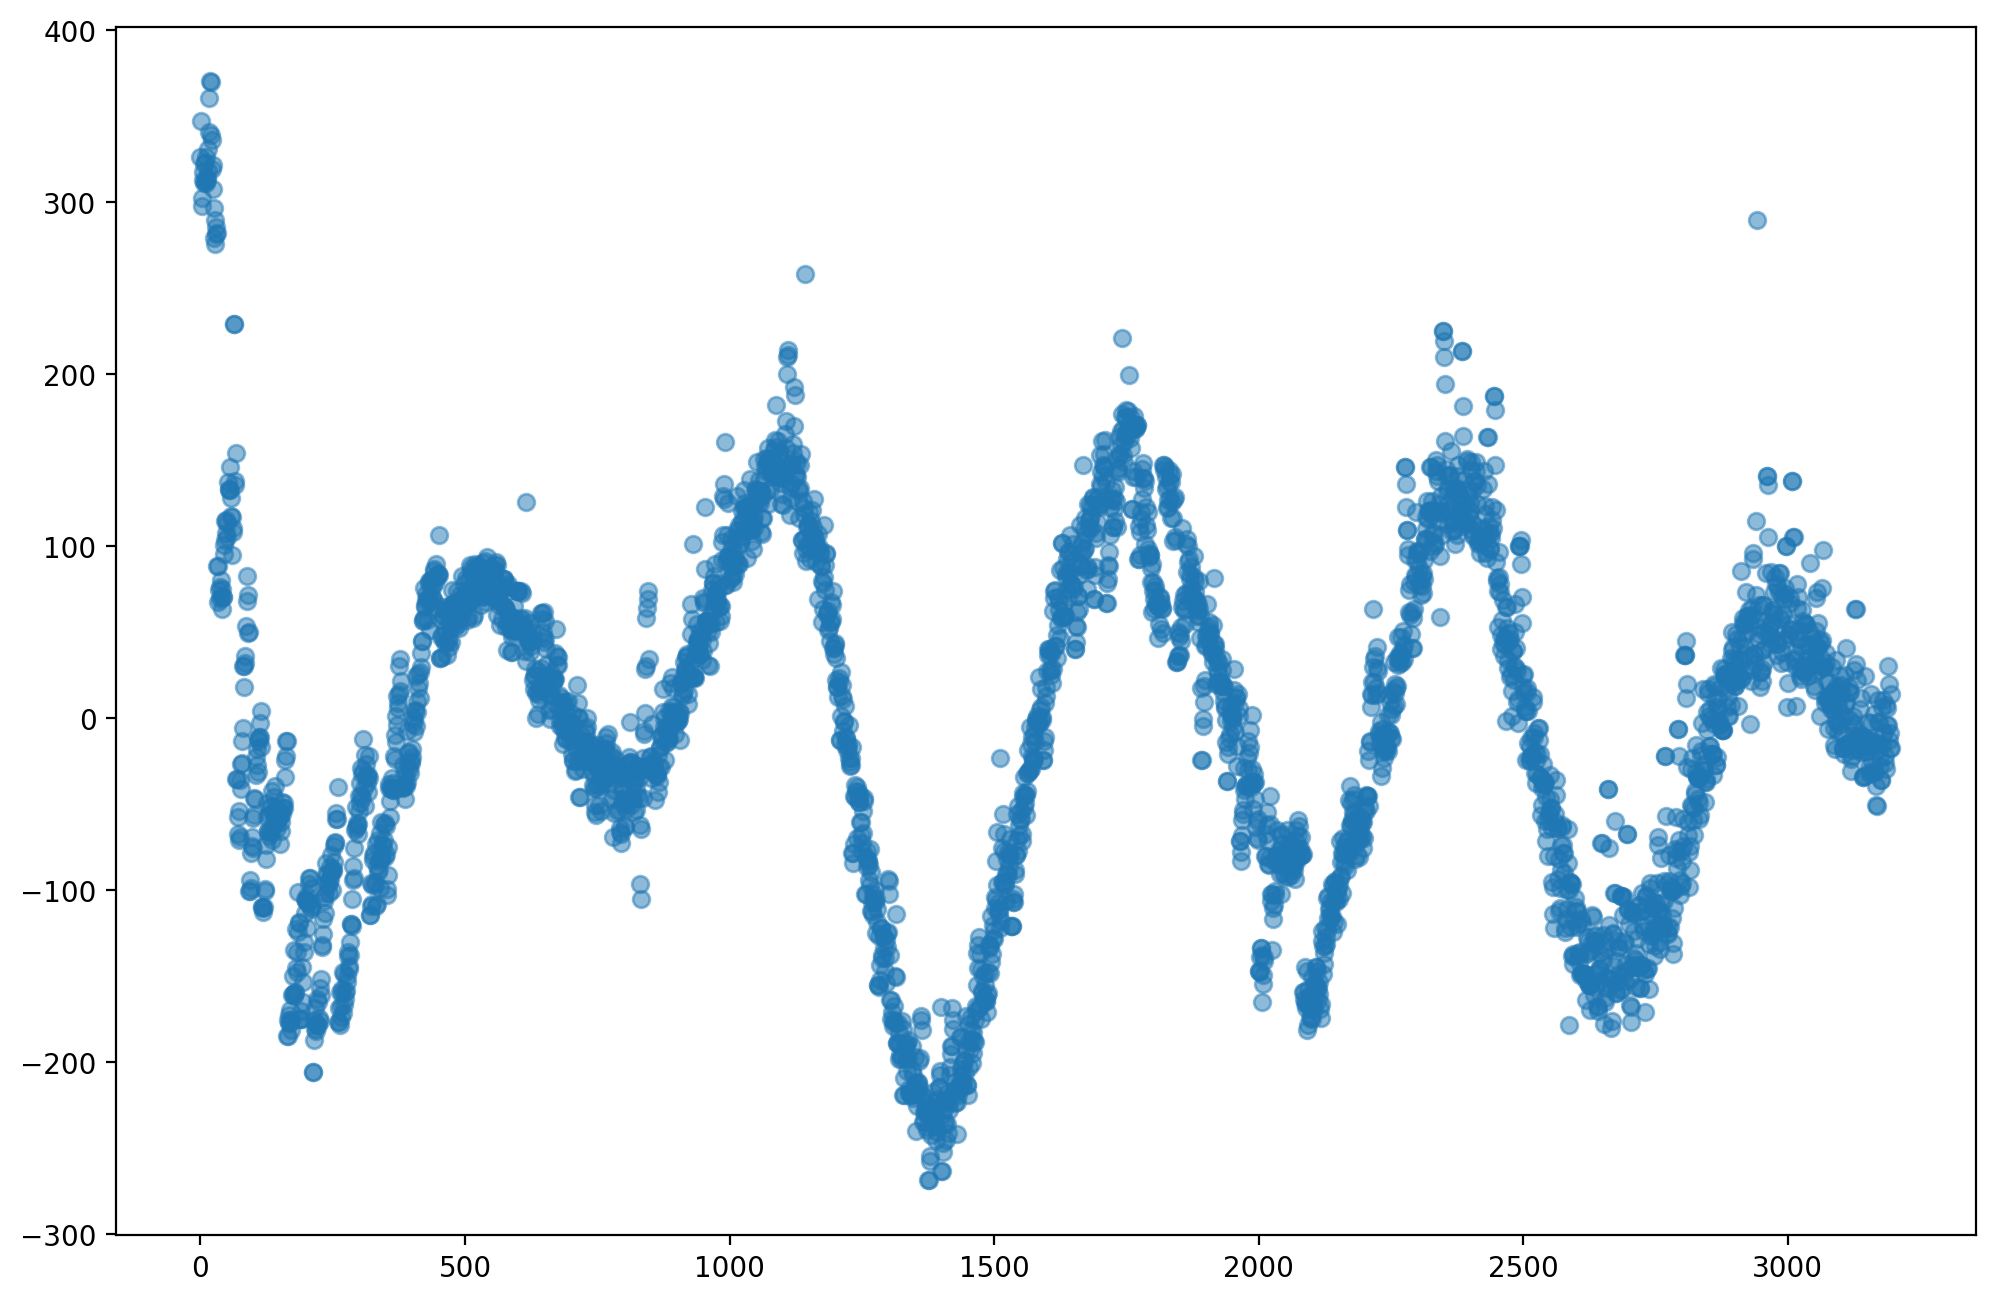

In [9]:
plt.figure(figsize=(12,8), dpi=200)
plt.scatter(np.arange(3197), df_train[df_train['LABEL'] == 2].iloc[3, 1:], alpha=0.5)

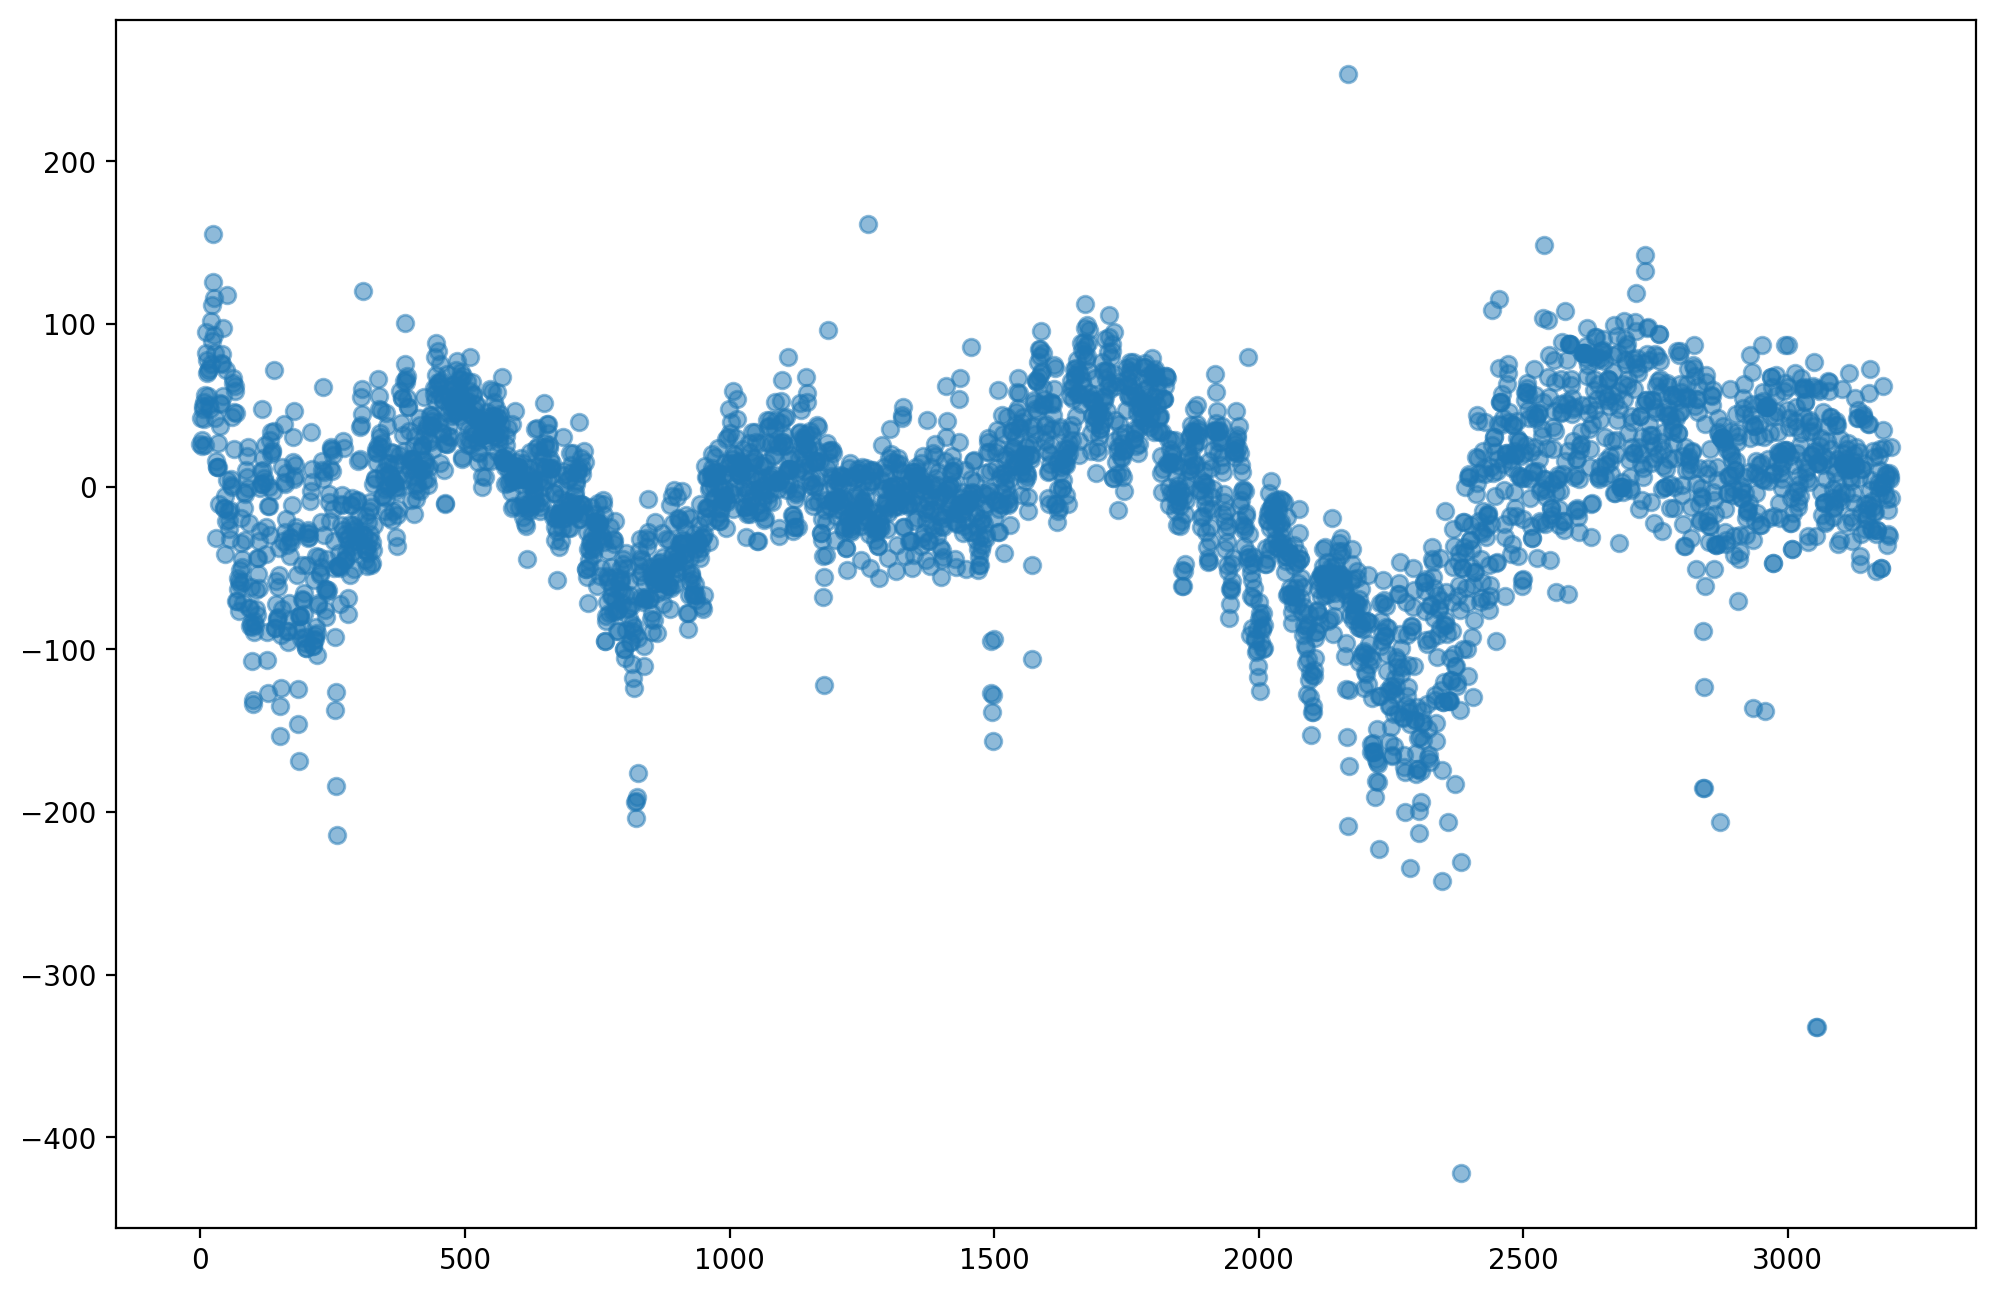

In [10]:
plt.figure(figsize=(12,8), dpi=200)
plt.scatter(np.arange(3197), df_train[df_train['LABEL'] == 2].iloc[36, 1:], alpha=0.5)

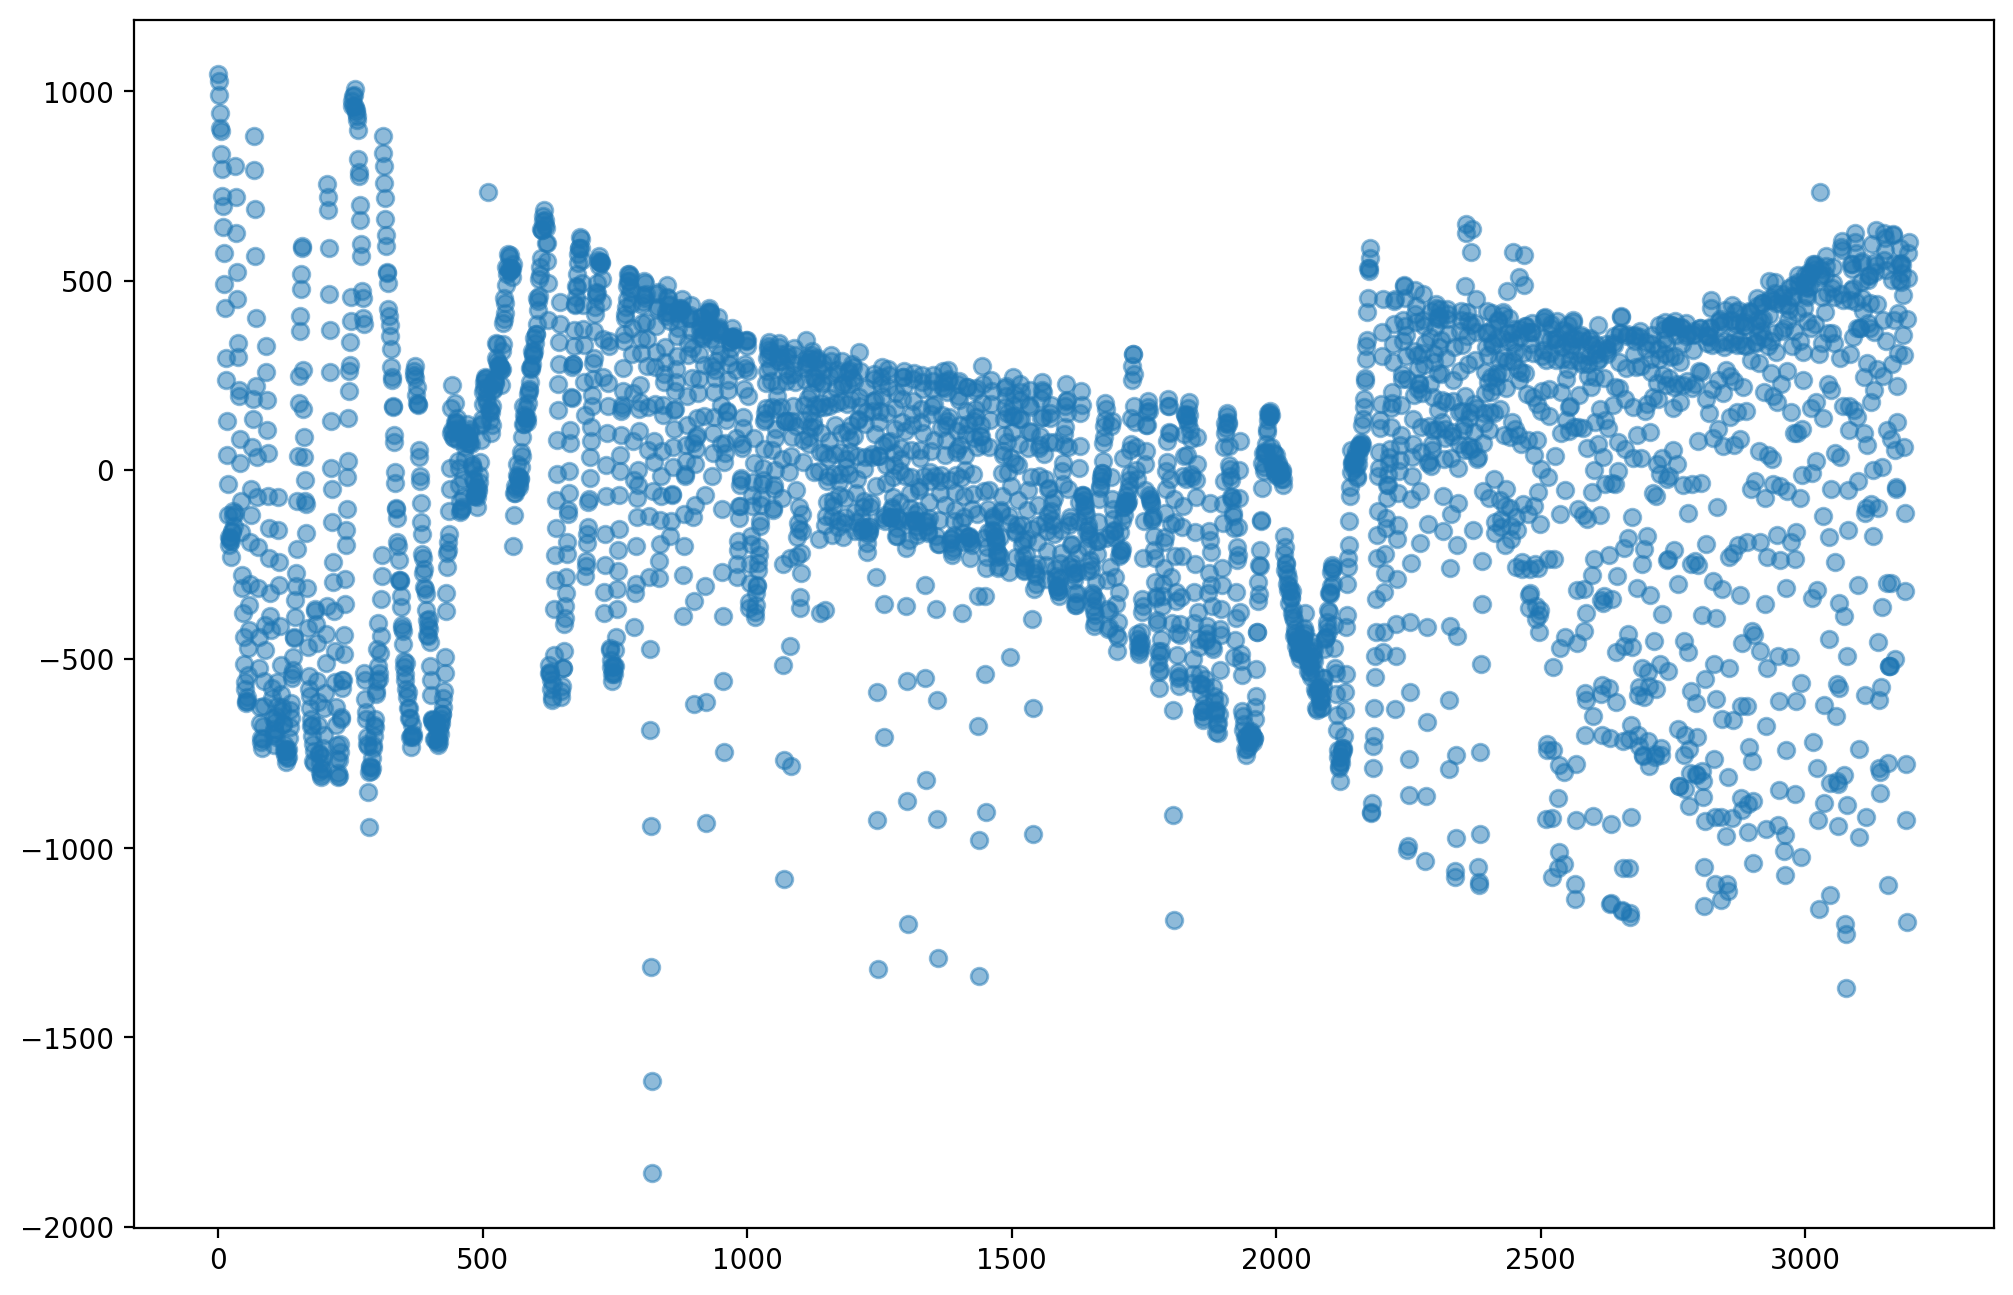

In [11]:
plt.figure(figsize=(12,8), dpi=200)
plt.scatter(np.arange(3197), df_train[df_train['LABEL'] == 1].iloc[5000, 1:], alpha=0.5)

In [40]:
import random


def random_plot_generator(label):

    """
    Plots randomly selected flux values of Label 1 (Non_exoplanet_star) and Label 2 (Exopanet_start)
    """

    if label == 1:
        index = random.randint(0, 5050)
    else:
        index = random.randint(0, 36)

    print(index)
    plt.figure(figsize=(12,8), dpi=200)
    plt.scatter(np.arange(3197), df_train[df_train['LABEL'] == label].iloc[index, 1:], alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Flux Intensity')
    plt.title('Flux Intensities Visualized')

5


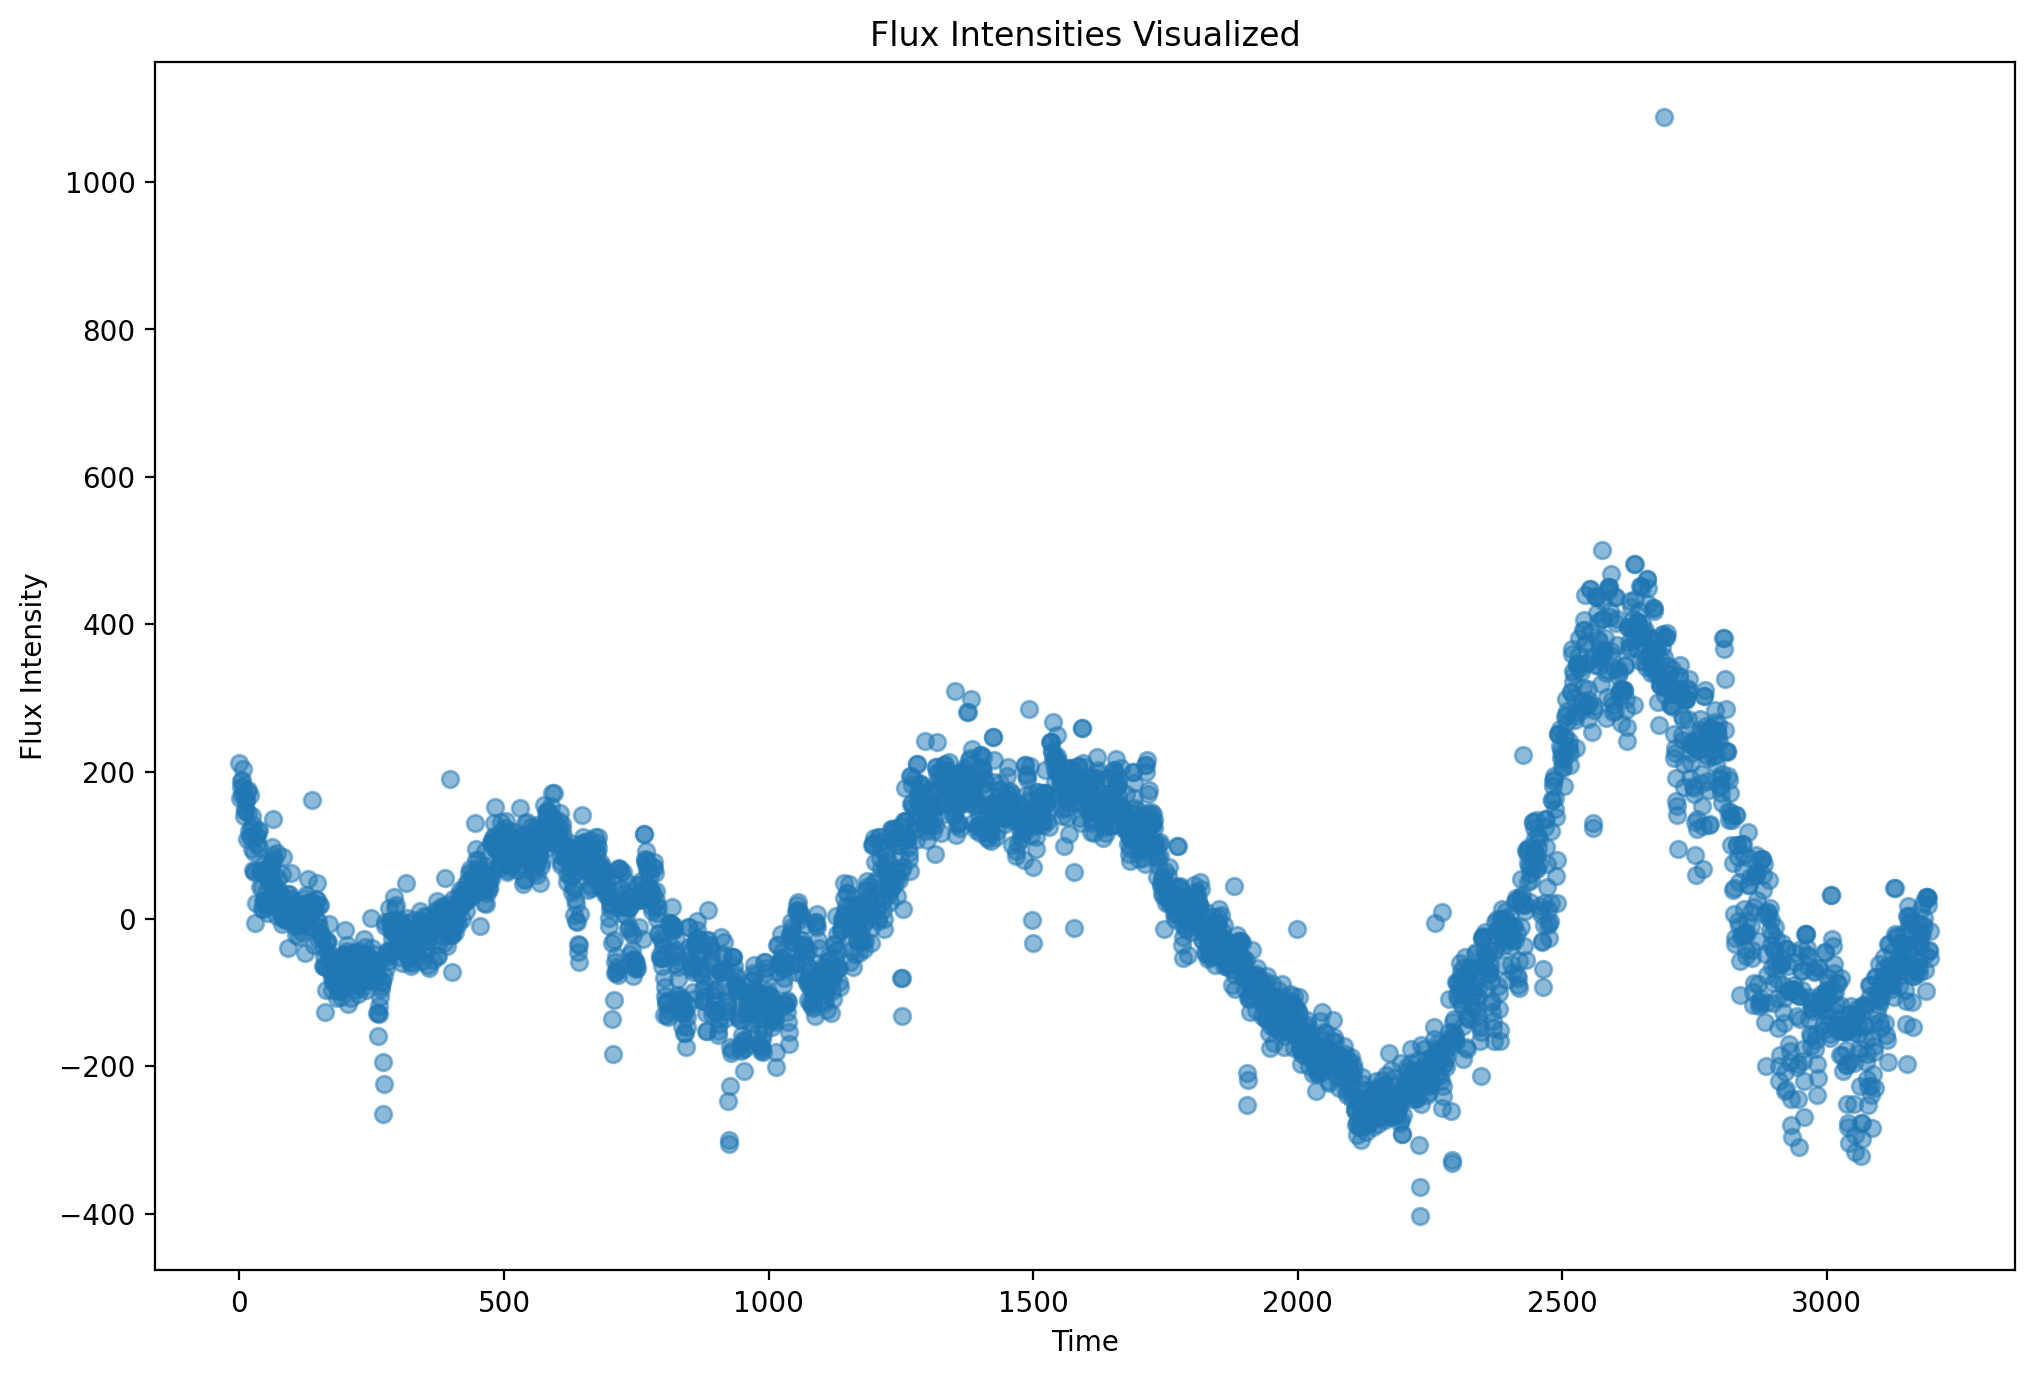

In [41]:
random_plot_generator(2)

3171


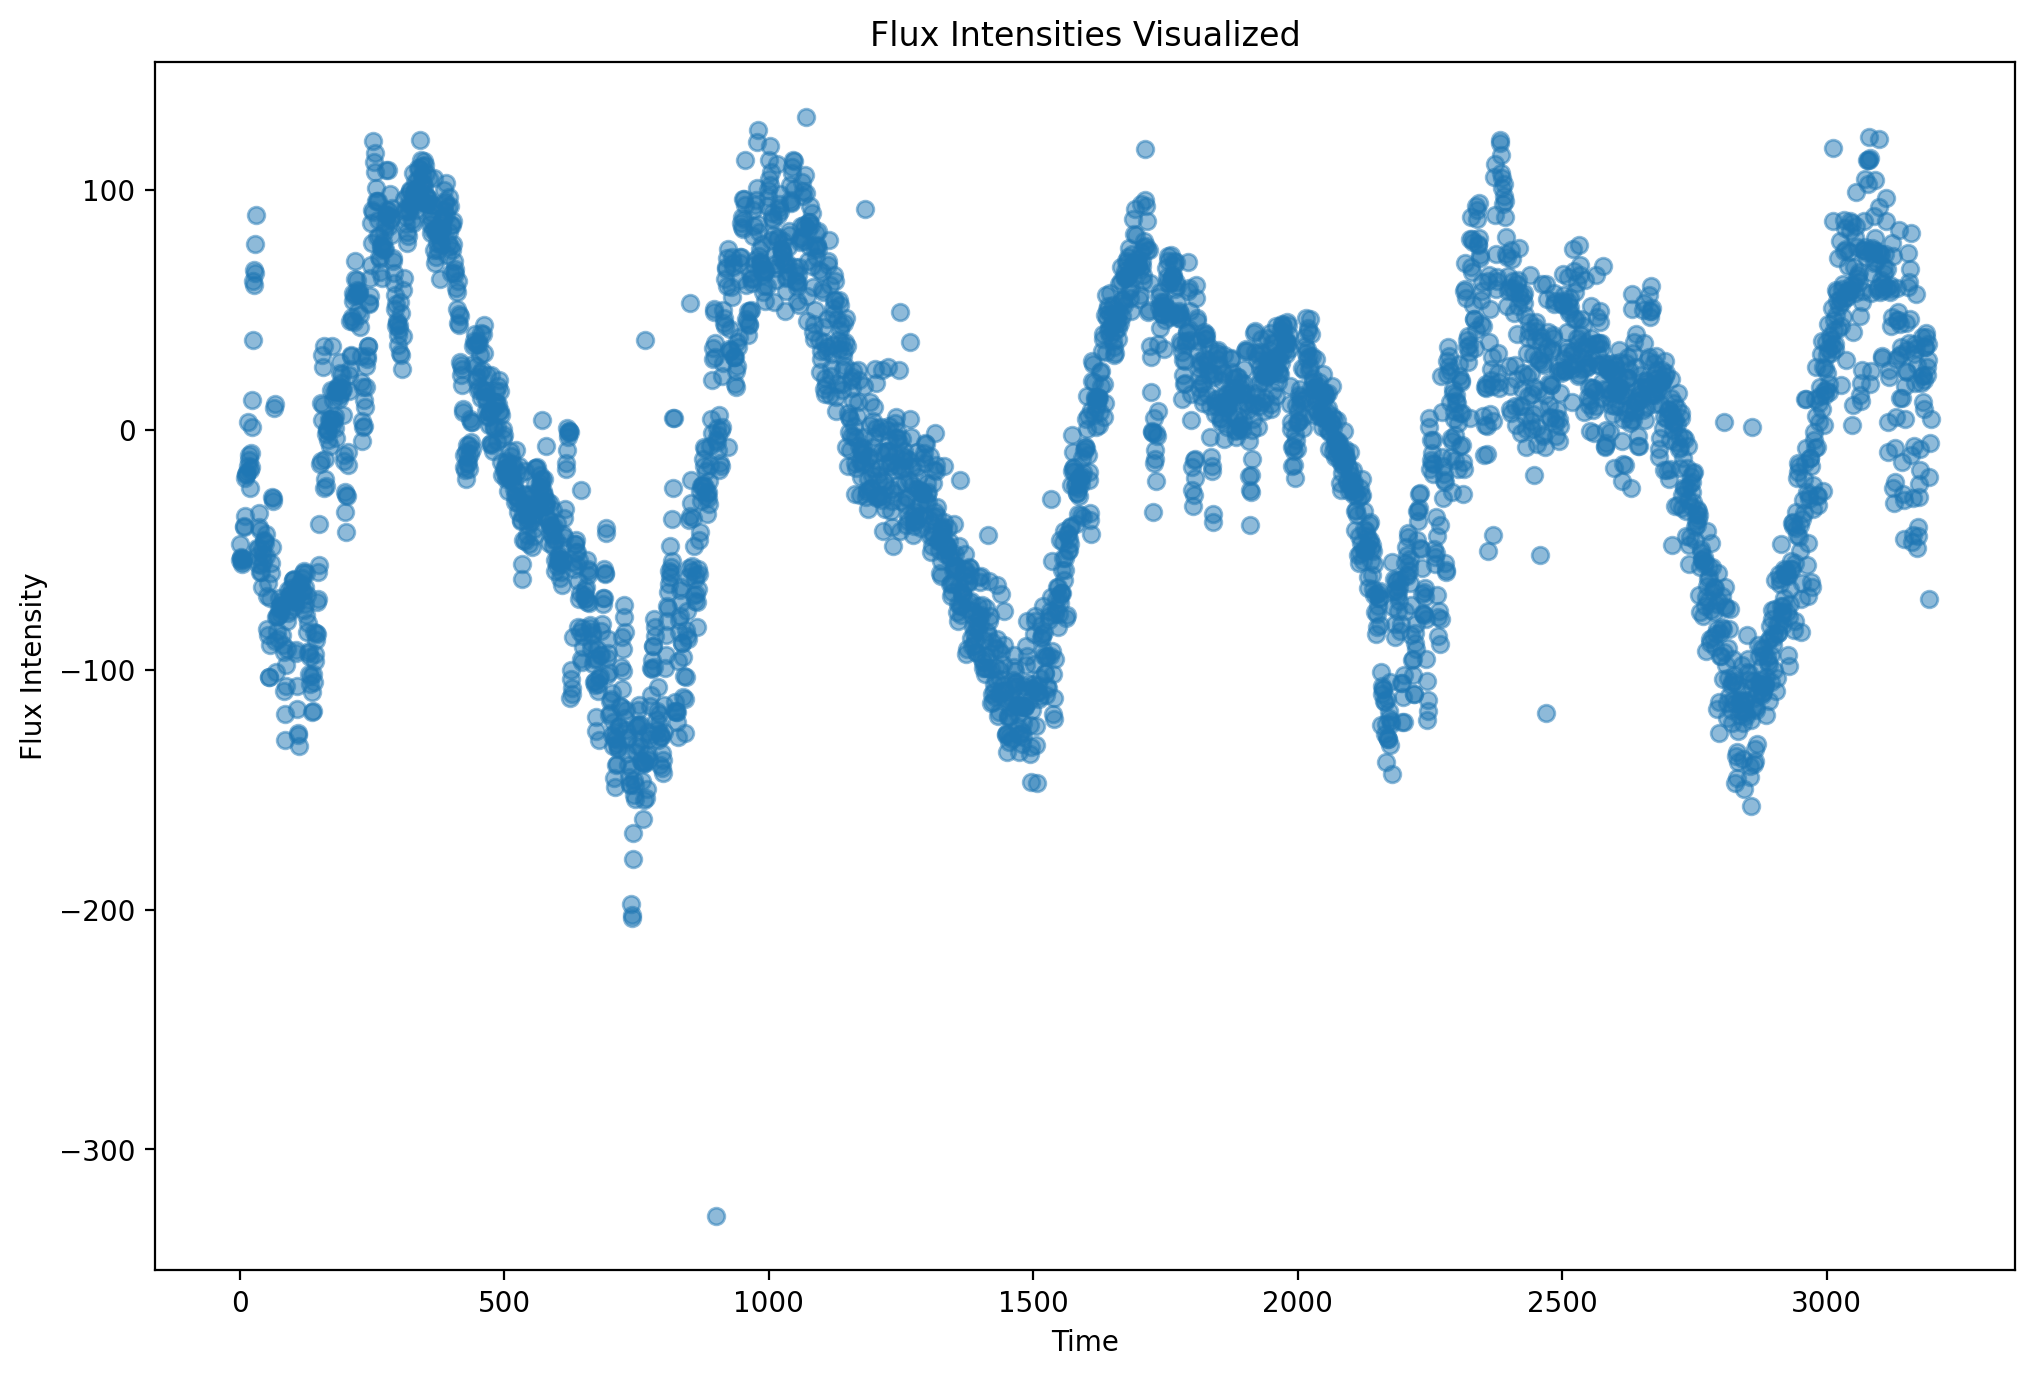

In [46]:
random_plot_generator(1)

# Preprocessing Data 

In [15]:
X = df_train.drop(['LABEL'], axis=1)
y = df_train['LABEL']

In [16]:
X.columns

Index(['FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6', 'FLUX.7',
       'FLUX.8', 'FLUX.9', 'FLUX.10',
       ...
       'FLUX.3188', 'FLUX.3189', 'FLUX.3190', 'FLUX.3191', 'FLUX.3192',
       'FLUX.3193', 'FLUX.3194', 'FLUX.3195', 'FLUX.3196', 'FLUX.3197'],
      dtype='object', length=3197)

In [48]:
# For imabalanced dataset 

from imblearn import under_sampling

balanced = under_sampling.NearMiss()
X_res, y_res = balanced.fit_resample(X, y)

In [49]:
X_res.shape, y_res.shape

((74, 3197), (74,))

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_sc = scaler.fit_transform(X_train)
test_sc = scaler.transform(X_test)

In [52]:
train_sc.shape, test_sc.shape, y_train.shape, y_test.shape

((59, 3197), (15, 3197), (59,), (15,))

## Logistics Regression 

In [53]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000).fit(train_sc, y_train)

In [54]:
y_preds = LR.predict(test_sc)
y_preds

array([1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        10
           2       1.00      0.40      0.57         5

    accuracy                           0.80        15
   macro avg       0.88      0.70      0.72        15
weighted avg       0.85      0.80      0.77        15



In [56]:
def classificatin_metrics(y_true=y_test, y_pred=y_preds):

    """
    Evaluate Model by getting classifier evaluation metrics like 
        - Accuracy 
        - Precision
        - Recall
        - F1 Score 
    """
    from sklearn import metrics

    print(f"Accuracy: {metrics.accuracy_score(y_test, y_preds)}")
    print(f"Precision: {metrics.precision_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds))}")
    print(f"Recall Score: {metrics.recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds))}")
    print(f"F1 Score: {metrics.f1_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds))}")

In [163]:
def classification_model(model, X_train, X_test, y_train, y_test):
    """
    Use this function to create Models and evaluate it using classification report and confusion matrix 
    """
    
    # Fit model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    from sklearn.metrics import classification_report, ConfusionMatrixDisplay
    
    # Diplay Classification report
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    disp.plot
    plt.show()

    # Plot Precision Recall Curve
    from sklearn.metrics import PrecisionRecallDisplay

    display = PrecisionRecallDisplay.from_estimator(
        model, X_test, y_test, name="LinearSVC"
    )
    _ = display.ax_.set_title("2-class Precision-Recall curve")


              precision    recall  f1-score   support

           1       0.77      1.00      0.87        10
           2       1.00      0.40      0.57         5

    accuracy                           0.80        15
   macro avg       0.88      0.70      0.72        15
weighted avg       0.85      0.80      0.77        15



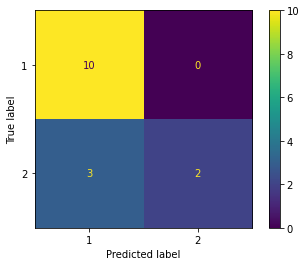

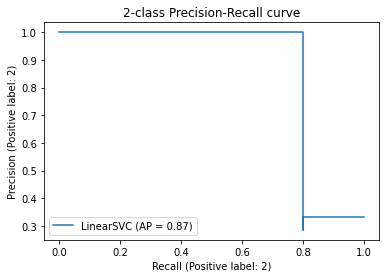

In [164]:
lr = classification_model(LogisticRegression(), X_train=train_sc, X_test=test_sc, y_train=y_train, y_test=y_test)

## KNN

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        10
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.86      0.60      0.58        15
weighted avg       0.81      0.73      0.67        15



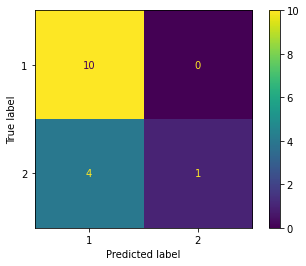

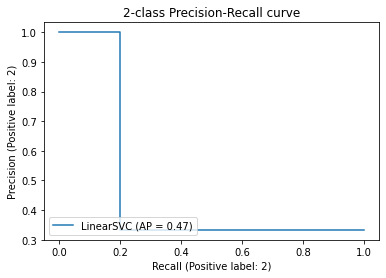

In [165]:
from sklearn.neighbors import KNeighborsClassifier

knn = classification_model(
    KNeighborsClassifier(n_neighbors=3), 
    X_train=train_sc, X_test=test_sc, 
    y_train=y_train, y_test=y_test
)

# SVM

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        10
           2       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.86      0.60      0.58        15
weighted avg       0.81      0.73      0.67        15



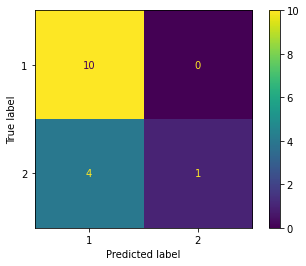

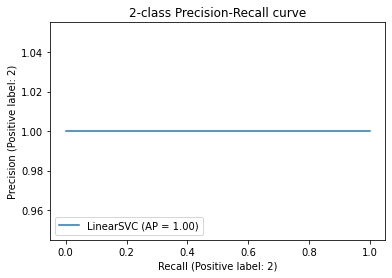

In [166]:
from sklearn.svm import SVC

svc = classification_model(SVC(), X_train=train_sc, X_test=test_sc, y_train=y_train, y_test=y_test)

# Random Forest

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.95      0.90      0.92        15
weighted avg       0.94      0.93      0.93        15



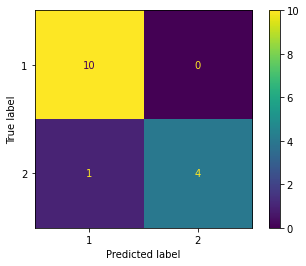

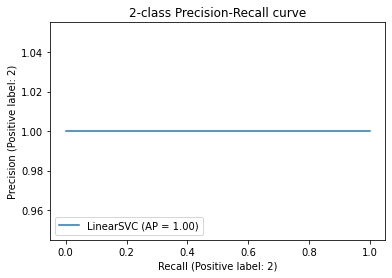

In [167]:
from sklearn.ensemble import RandomForestClassifier

rfc = classification_model(RandomForestClassifier(), X_train=train_sc, X_test=test_sc, y_train=y_train, y_test=y_test)

Random Forest Classifier seems to be the best performing estimator without any
hyperparameters tuning. Perhaps using Cross validation it can give more reliable results for the unseen data. 

In [66]:
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier()
print(cross_val_score(rfc, X_res, y_res, cv=10, scoring='accuracy').mean())

0.9589285714285716


In [71]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 15, 20, 50, 100],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [2, 3, 5],
    'max_features': ('auto', 'sqrt'),
    'bootstrap': [True, False]
}

rfc = RandomForestClassifier()

clf = GridSearchCV(rfc, parameters)
clf.fit(X_res, y_res)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 15, 20, 50, 100],
                         'max_features': ('auto', 'sqrt'),
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200, 500, 1000]})

In [72]:
clf.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [75]:
train_sc.shape, test_sc.shape

((59, 3197), (15, 3197))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



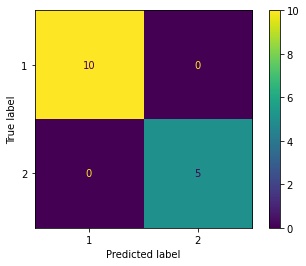

In [76]:
final_model = classification_model(
    RandomForestClassifier(
        bootstrap=True,
        max_depth=10,
        max_features='sqrt',
        min_samples_leaf=2,
        min_samples_split=2,
        n_estimators=200
    ), 
    X_train=train_sc, 
    X_test=test_sc, 
    y_train=y_train, 
    y_test=y_test)